# Support Vector Machine

This algorithm is based on a simple concept, but the math behind it is convoluted. Let's start at the ground level:  
*An SVM algorithm is supposed to find separation between 2 classes so that the distance between this separator and the nearest data points of both classes is maximized.* Remember our binary classification examples from before. We had a line that separated the two classes. Remember that this line was guessed at first. The SVM algorithm would have chosen the line that sat right in the middle of those 2 classes, thus leaving the most amount of space between them. This is the concept of SVM.  
We call the separator a **hyperplane**. This is because we can work with as many dimensions (features) as we want. The term is just a substitute for the word "plane" in higher dimensions.  
The hyperplane can be a linear separator. In practice, we also find situations where linear separators don't work. We have solutions for those cases as well, but we will discuss them later.  

Let's take a step back. SVM is a supervised algorithm used for classification. The goal is to leave the maximum amount of space between the separator and those 2 classes. To achieve this, a lot of math is involved. I would like to propose a more naive approach to this problem, since the math itself can be found in other sources, but generally people rely on frameworks to do the heavy lifting for them anyway.

In [162]:
# Import the basic libraries
import numpy as np
import matplotlib.pyplot as plt
# Import scikit stuff + blobs
from sklearn import svm
from sklearn.datasets import make_blobs


A better appproach to understanding the SVM concept is to see it in action as part of a library

In [163]:
# Make 2 blobs of data
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

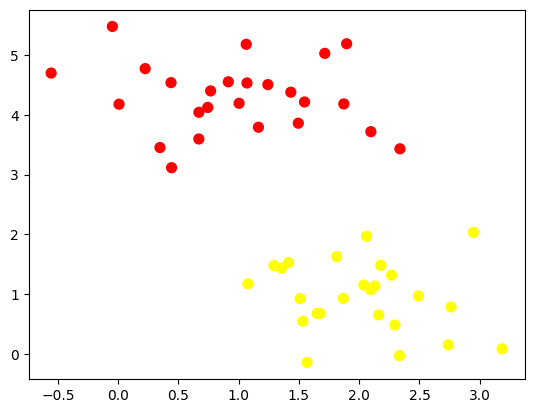

In [164]:
# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [165]:
# Train SVM on data (Support Vector Classification)
clf = svm.SVC(kernel='linear', C=1E10)
clf.fit(X, y)


SVC(C=10000000000.0, kernel='linear')

In [166]:
# Plot model and data
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

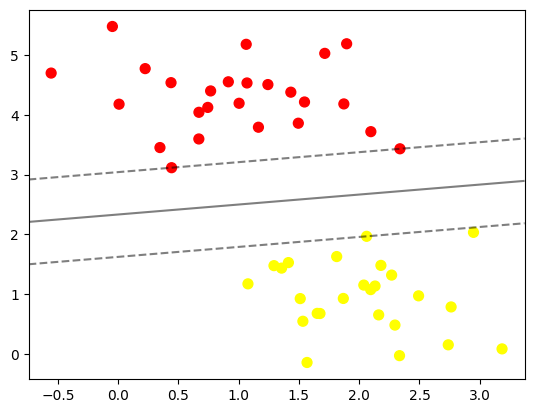

In [167]:
# Contor model
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)

We can see in this plot that the line was chosen so that it maximizes distance from points on both sides. Don't worry about the code to plot this. It's not important for our purposes, though you can analyze it if you want.  
This is a classification scenario. When we encounter regression problems, we call SVM a **Support Vector Regression**. The concept is somewhat the same. Although we won't be implementing it, frameworks can be used to work with it quite easily. What's different from a normal regression is that instead of trying to minimize error to datapoints, we get some flexibility in that we can allow some error. We choose $\epsilon$ to be the amount of error we are willing to tolerate. We then try to minimize the L2-norm of the coefficient (weights, parameters) vector (why: the math involved explains this, but for now the best thing is to get the intuition behind the algorithm/method). We also have the previous constraint of $error < \epsilon$, and together they allow us to find the best fit line. Remember that SVMs work in higher dimensions quite well (with feature engineering), so the model's goal is to find the best fit hyperplane (we can jump to higher dimensions when necessary).

#### Back to classification

This is a great moment to talk a bit about types of SVMs. 
* Hard-margin SVM: the classic one; a classifier that finds the best hyper plane to separate classes. This one does not tolerate outliers (points that are missclassified). It is a very strict classifier.
* Soft-margin SVM: a classifier that allows some tolerance for outliers. It is a more flexible classifier. Instead of locking data points outside of the support vectors (look above, there are no points between the dotted lines), we allow for some points to "intrude". This algorithm introduces a tolerance hyper-parameter (also called *slack*), used to control tolerance for outliers. This is essentially a regularization technique; it's the most used type of SVM in practice.
* Kernel SVM: a classifier that allows for non-linear separators. This is a more advanced type of SVM, and we will see it in action later. For now, we should keep in mind that not all data points are linearly separable. The **kernel trick** involves using some kind of function to transform the data into a linearly separable equivalent. This is essentially done by introducing a new dimension. We'll see it shortly.


Let's see how a soft-margin SVM would be different. We'll generate blobs that have some overlaps and let the framework handle everything.

In [168]:
X,y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.70)

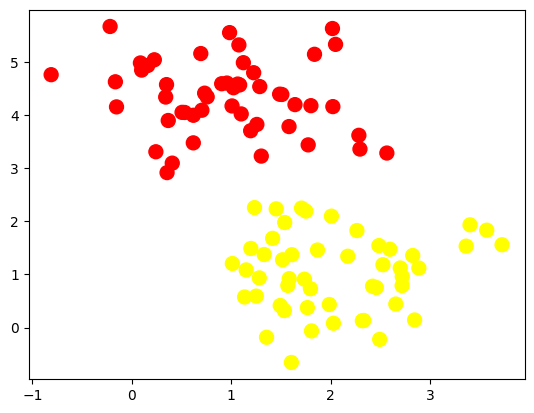

In [169]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn')

In [170]:
# Train a soft-margin SVM
clf = svm.SVC(kernel='linear', C=0.5) # YOU CAN CHANGE THIS VALUE TO SEE THE EFFECT ON THE MODEL
clf.fit(X, y)


SVC(C=0.5, kernel='linear')

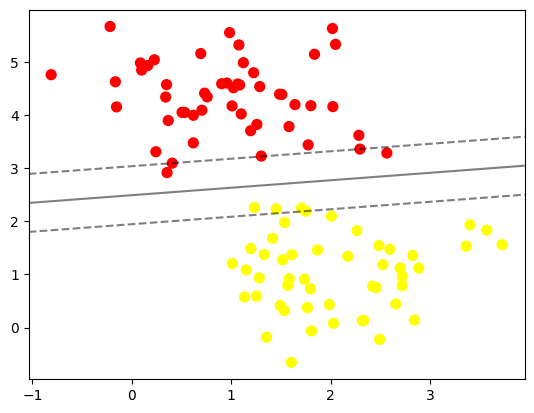

In [171]:
# Plot the dataset and the model
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=True)


As you can see, the model now allows for some points to intrude inside the decision boundary margins. We call this 'tolerance'. It's controlled by the $C$ parameter. The higher the $C$, the less tolerance we have. The lower the $C$, the more tolerance we have. This is a regularization parameter; try to pick various values and see what happens. The real world is messy, and datasets often overlap, so the *soft-margin SVM* algorithm is the most used in practice.

I would now like to touch on the kernel trick. This is a very important concept, and it's the reason why SVMs are so powerful. The kernel trick is a way to transform data into a higher dimension, so that it becomes linearly separable. This is done by introducing a new dimension. The way we do it varies from instance to instance, sometimes it can be chosen by hand, but most of the time it's done by the framework. We'll see it in action shortly.  
We generate a non-linearly-separable dataset and apply the kernel trick to it.

In [172]:
from sklearn.datasets import make_circles

In [173]:
# Generate dataset with concentric circles
X, y = make_circles(100, random_state=0, factor=.1, noise=.15)

Xtmp = np.append(X, np.zeros(shape=(1,2)), axis=0)
ytmp = np.append(y, 2)

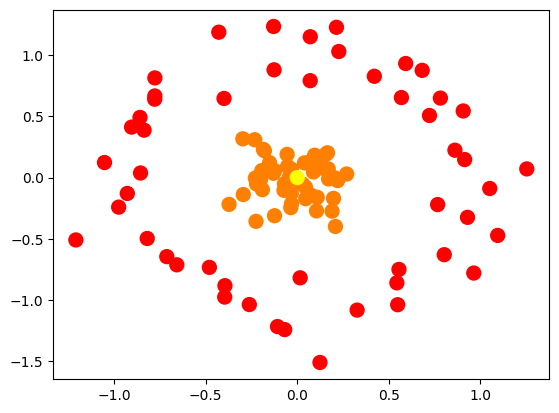

In [174]:
# Plot dataset
plt.scatter(Xtmp[:, 0], Xtmp[:, 1], c=ytmp, s=100, cmap='autumn')

As you can see, this dataset is clearly not fit for a linear classifier. For starters, we see we're working with circles. This leads to the question: "Can I separate these circles somehow?".  
Well of course you can. Although we do observe noise in the data, we know for sure that we can use things we know about circles to transform our data. I've introduced a temporary new point in the center (0,0). As you can see, points that are somewhat close to this center (the circle has a lower radius) are part of one class, and points that are somewhat far from the center (the circle has a higher radius) are part of the other class. This is a very simple example, but it's a good way to understand the concept.  

Naturally then, we would use something about a circle's radius to distinguish our classes. As it so happens, we have the circle's equation for that:  

$$x^2 + y^2 = r^2$$  

So we create a new feature, $r$, which is the distance from the center. We can then use this new feature to separate our classes. This is the kernel trick. We transform our data into a higher dimension, so that it becomes linearly separable. Please note that this would transform our data into 3D. We will visualize both in 2D (by omitting one of the features, like a sideways view) and 3D, so that we can better understand what is happening.

In [175]:
# Transform X to add a third feature based on the circle equation
r = X[:,0]**2 + X[:,1]**2
r = r.reshape(100,1)
X = np.hstack([X, r])

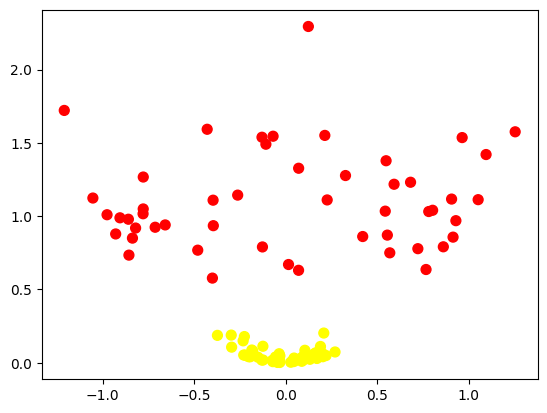

In [176]:
# Visualize new dataset in both 2D and 3D
# 2D first
plt.scatter(X[:, 0], X[:, 2], c=y, s=50, cmap='autumn')

What we see here is a visualization from the side. We can now clearly separate the data using a linear SVM. Our job is done, essentially.  
Let's see the 3D version as well.

In [177]:
# Import plotly 3D visualization
import plotly.graph_objects as go


In [178]:
# 3D visualization using plotly
points = go.Scatter3d(x=X[:, 0],y=X[:, 1],z=X[:, 2], mode='markers', marker=dict(size=8, color = y, colorscale='viridis',opacity=1.0))

fig = go.Figure(data=[points])
fig.show()

This visualization looks cooler, right? We have the freedom to move around and verify that our data does indeed look like that from a sideways view (in 2D).  

The thing is... we don't need all 3 features once we've created the new dimension. Doing more calculations only makes everything slower. Since our data is linearly separable in 2D (with only 2 features chosen), we don't need the 3rd, so we could theoretically drop it (make some other array that doesn't use it). Just something to think about.  

Let's now train a model on this 3D data. We'll use the same code as before, but we'll use the new features.

In [179]:
# Train SVM on 3D dataset
clf = svm.SVC(kernel='linear', C=1E10)
clf.fit(X, y)


SVC(C=10000000000.0, kernel='linear')

In [180]:
# Create function to plot model in 3D using plotly
def plot_svc_3D(model):
    Z = lambda X,Y: (-clf.intercept_[0]-clf.coef_[0][0]*X-clf.coef_[0][1]*Y) / clf.coef_[0][2]
    plane = go.Mesh3d(x=X[:,0], y=X[:,1], z=Z(X[:,0],X[:,1]), opacity=0.9, color='lightblue')
    return plane
# Plot support vectors
def plot_svc_support_vectors(model):
    a = -model.coef_[0][0] / model.coef_[0][2]
    yy = a * X[:,0] - (model.intercept_[0]) / model.coef_[0][2]
    margin = 1 / np.sqrt(np.sum(model.coef_**2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin
    sv1 = go.Mesh3d(x=X[:,0], y=X[:,1], z=yy_down, opacity=0.9, color='pink')
    sv2 = go.Mesh3d(x=X[:,0], y=X[:,1], z=yy_up, opacity=0.9, color='pink')
    return [sv1,sv2]
def plot_svc_decision_boundary(model):
    db = go.Mesh3d(x = X[:,0], y = X[:,1], z = model.decision_function(X), opacity=0.2, color='yellow')
    return db

In [184]:
# Plot in 3D
points = go.Scatter3d(x=X[:, 0],y=X[:, 1],z=X[:, 2], mode='markers', marker=dict(size=8, color = y, colorscale='viridis',opacity=1.0))
plane = plot_svc_3D(clf)
support_vectors = plot_svc_support_vectors(clf)
decision_boundary = plot_svc_decision_boundary(clf)
fig = go.Figure(data=[plane, points, support_vectors[0], support_vectors[1], decision_boundary])
fig.update_layout(
     scene = dict(
        xaxis = dict(nticks=4, range=[-1,1]),
        yaxis = dict(nticks=4, range=[-1,1]),
        zaxis = dict(nticks=4, range=[-1,2])))
fig.show()

We now see that the model is somewhere in-between the 2 classes, meaning that our fit has the biggest margin. As  an exercise, you can try modifying previous code to get points that overlap and classify using a soft-margin SVM (just lower the $C$ parameter).  
We have out 2 margins with <span style="color:pink">pink</span>  
Our model is <span style="color:lightblue">light blue</span>  
Our decision boundary is <span style="color:yellow">yellow</span>  

You can play with the visualizations if you need to. The best way to understand the concept deeply is modify bits at a time and see how it affects the model (or the visualization, although that's not our primary goal).

Up next: [SVM Math](svmMathBehind.ipynb)